In [1]:
import numpy as np
import pandas as pd

C:\Users\light\AppData\Local\Temp\ipykernel_53496\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
coverage_preds = pd.read_csv("predictions/full_cb_wr_data_with_move_burst_dir_features.csv")


In [3]:
coverage_preds.head()

,gameId,playId,week,nflIdDef,defPlayerName,defenseTeam,defPos,nflIdOff,offPlayerName,possessionTeam,...,nflId,height,displayName,heightOff,heightAdv,Move Separation,Move Occurred,Time To Move,Release Burst,pred_man
0,2018090600,75,1,2555383,Jalen Mills,PHI,CB,2495454,Julio Jones,ATL,...,2495454,74,Julio Jones,74,0,0.760938,1,35,4.283333,0.037823
1,2018090600,146,1,2552689,Ronald Darby,PHI,CB,2557034,Marvin Hall,ATL,...,2557034,74,Marvin Hall,74,0,0.000000,0,0,3.630000,0.045660
2,2018090600,146,1,2555383,Jalen Mills,PHI,CB,2560854,Calvin Ridley,ATL,...,2560854,74,Calvin Ridley,74,0,0.000000,0,0,2.750000,0.058134
3,2018090600,146,1,2557958,Sidney Jones,PHI,CB,2552418,Justin Hardy,ATL,...,2552418,74,Justin Hardy,74,0,0.000000,0,0,3.223333,0.056922
4,2018090600,168,1,2552689,Ronald Darby,PHI,CB,2533040,Mohamed Sanu,ATL,...,2533040,74,Mohamed Sanu,74,0,0.000000,0,0,3.146667,0.053701


In [4]:
# I want to see percentage of plays that have a move in the first place 
# just want a percentage please
total_plays = coverage_preds.shape[0]
plays_with_move = coverage_preds[coverage_preds['Move Occurred'] != 0 ].shape[0]
percentage_with_move = (plays_with_move / total_plays) * 100
print(f"Percentage of plays with a move: {percentage_with_move:.2f}%")


Percentage of plays with a move: 22.82%


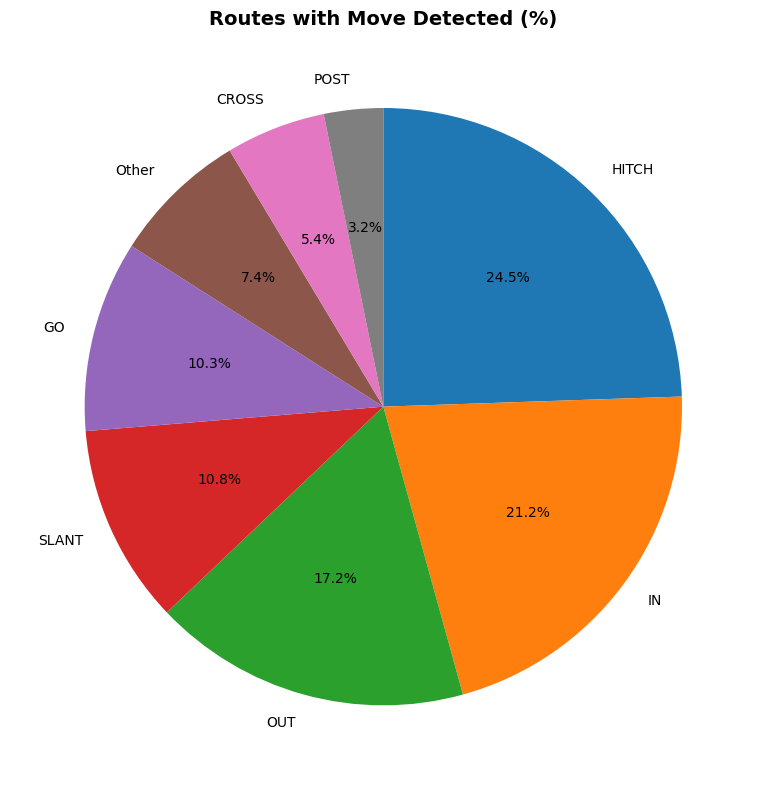

In [9]:
import matplotlib.pyplot as plt

# Filter to plays with a detected move
moves_df = coverage_preds[coverage_preds["Move Occurred"] == 1]

# Count routes
route_counts = moves_df["route"].value_counts()

# Compute total and identify small slices (<1%)
total = route_counts.sum()
threshold = total * 0.03
small_routes = route_counts[route_counts < threshold]

# Combine into "Other"
if not small_routes.empty:
    route_counts = route_counts[route_counts >= threshold]
    route_counts["Other"] = small_routes.sum()

# Sort and plot
route_counts = route_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(
    route_counts,
    labels=route_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Routes with Move Detected (%)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


           Total Plays  Moves Detected  % Moves Detected
route                                                   
ANGLE                1               1            100.00
IN                4182            1818             43.47
OUT               3875            1472             37.99
SLANT             2965             923             31.13
undefined           59              18             30.51
HITCH             7136            2093             29.33
FLAT              1092             234             21.43
SCREEN             946             170             17.97
CROSS             3403             462             13.58
CORNER            1988             207             10.41
GO               11042             885              8.01
POST              3743             274              7.32
WHEEL                4               0              0.00


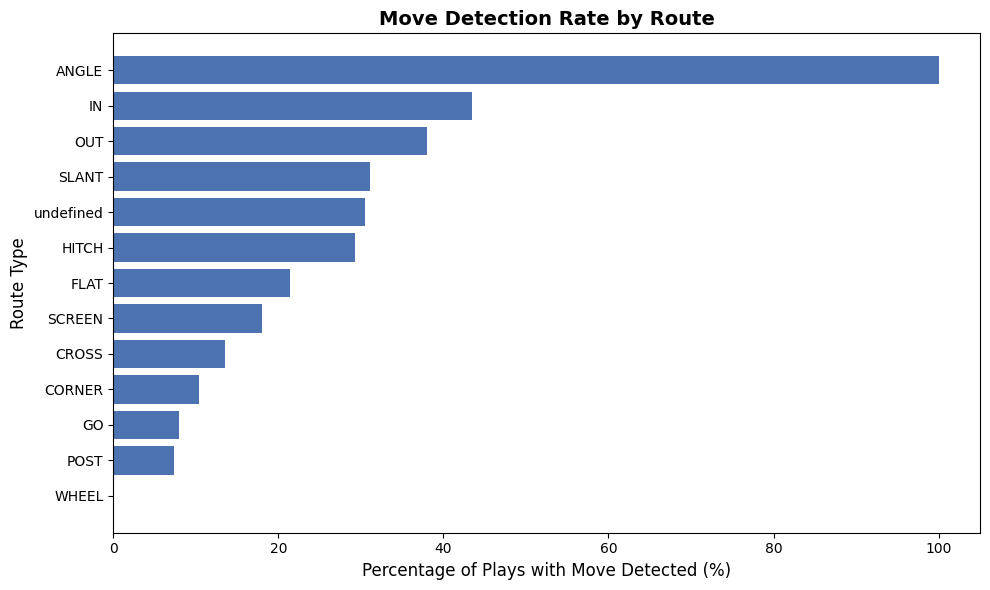

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by route: total plays vs plays with move
route_stats = (
    coverage_preds.groupby("route")["Move Occurred"]
    .agg(["count", "sum"])  # count = total, sum = number with move
    .rename(columns={"count": "Total Plays", "sum": "Moves Detected"})
)

# Compute percentage
route_stats["% Moves Detected"] = (route_stats["Moves Detected"] / route_stats["Total Plays"]) * 100
route_stats = route_stats.sort_values("% Moves Detected", ascending=False)

# Display table
print(route_stats.round(2))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(route_stats.index, route_stats["% Moves Detected"], color="#4C72B0")
plt.xlabel("Percentage of Plays with Move Detected (%)", fontsize=12)
plt.ylabel("Route Type", fontsize=12)
plt.title("Move Detection Rate by Route", fontsize=14, weight="bold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


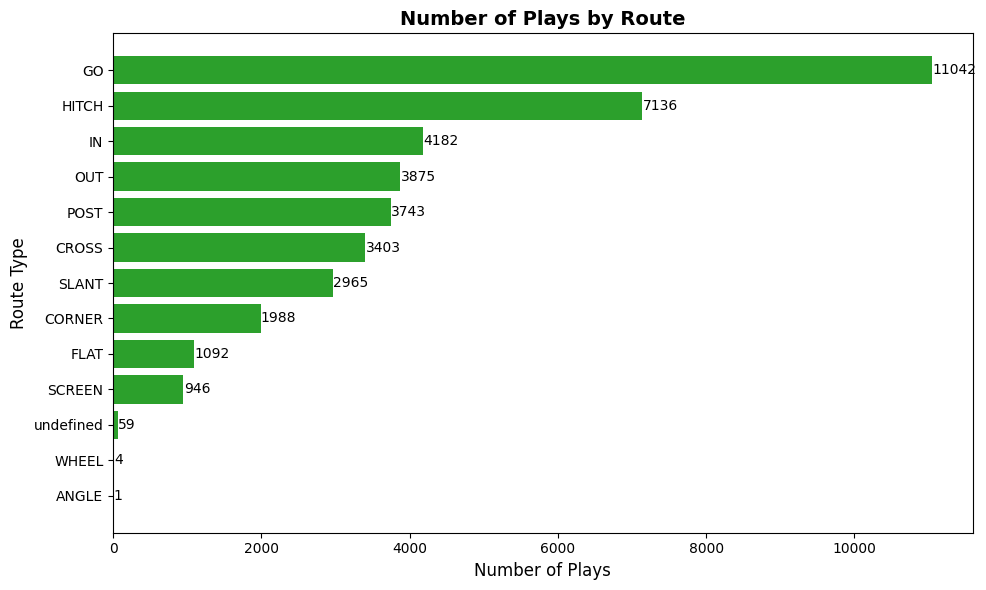

In [12]:
import matplotlib.pyplot as plt

# Count total plays per route
route_counts = coverage_preds["route"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(route_counts.index, route_counts.values, color="#2ca02c")

plt.xlabel("Number of Plays", fontsize=12)
plt.ylabel("Route Type", fontsize=12)
plt.title("Number of Plays by Route", fontsize=14, weight="bold")
plt.gca().invert_yaxis()

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5,                          # small offset to the right
        bar.get_y() + bar.get_height() / 2, # vertical centering
        f"{int(width)}",                    # number as integer
        va="center", ha="left", fontsize=10, color="black"
    )

plt.tight_layout()
plt.show()
